# House price prediction  
Given the size and number of bedrooms learn a model to predict the price of the house.  
Use Gradient descent and Normal Equations method for Linear Regression.  
Also demostrate the use of LinearRegression from sklearn!

In [182]:
# necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [183]:
# load the data
data_set = pd.read_csv('house_price.csv')
data_set.head(2)

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900


Given the size of the house and the number of bedrooms, we have to predict the price.  
Let's fit a linear regression model to this problem as follows:  
Let's consider the features size and bedrooms as $x_1$ and $x_2$ respectively then we have the following hypothesis function:  
$house\_price = h_\theta(x_1, x_2) = \theta_0 + \theta_1x_1 + \theta_2x_2$  

In [184]:
# let us look at the information
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   size      47 non-null     int64
 1   bedrooms  47 non-null     int64
 2   price     47 non-null     int64
dtypes: int64(3)
memory usage: 1.2 KB


In [185]:
# look for the missing data in the data-set
data_set.isnull().sum()

size        0
bedrooms    0
price       0
dtype: int64

Luckily we don't have any missing values in our data-set!

# Exploratory Data Analysis

<AxesSubplot:xlabel='price'>

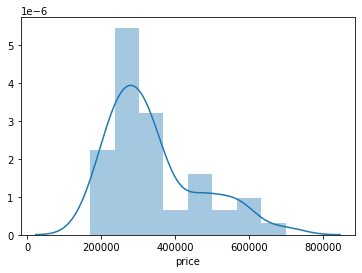

In [186]:
# distribution of prices
sns.distplot(data_set['price'])

<AxesSubplot:xlabel='price'>

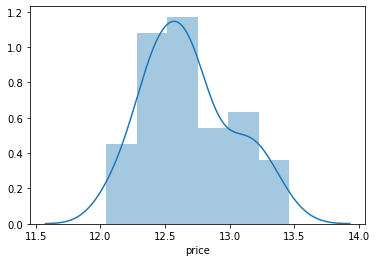

In [187]:
# distribution of prices on log scale
sns.distplot(np.log(data_set['price']))

Log scale plot seems to be better normally distributed

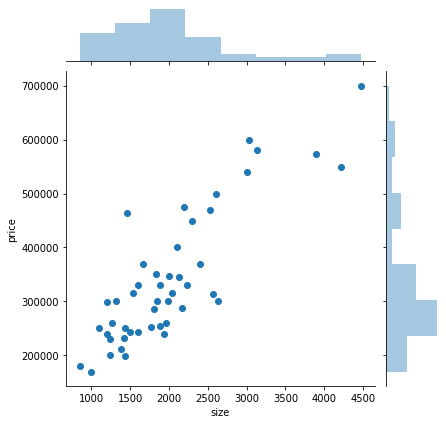

In [188]:
# distribution of prices w.r.t house-size
sns.jointplot(x='size', y='price', data=data_set)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

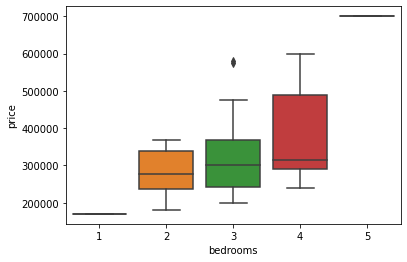

In [189]:
# distribution w.r.t bedrooms
sns.boxplot(x='bedrooms', y='price', data=data_set)

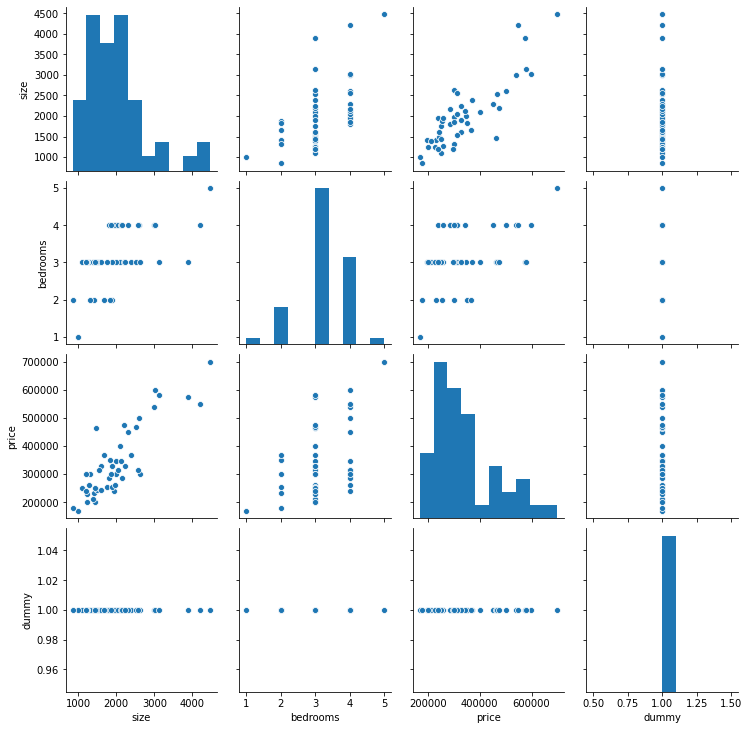

In [213]:
sns.pairplot(data_set)

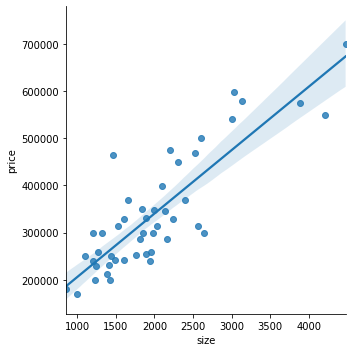

In [217]:
# lmplot price and size
sns.lmplot(x='size', y='price', data=data_set)

## Maximum Likelihood Estimation
Given the model $\hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2$ and the training set, we want to predict the parameters $\theta_0, \theta_1, \theta_2$ such that our predicted values are as close to the actual value as possible or we want to minimize the root mean square error.  
$RMSE = \sqrt{\frac{1}{m}\sum_{i = 1}^{m} (\hat{y}_i - y_i)^2}$  
where $m$ is the number of traning samples, $n$ is the number of features, $\hat{y}_i$  $y_i$ are the predicted and actual values of the $i^{th}$ training sample.   


## Gradient descent method
We note that minimizing the root mean square error is same as minimizing the normalized mean squared error i.e.  
$J(\theta_0, \theta_1, \theta_2) = \frac{1}{2m}\sum_{i=1}^{m}(\hat{y}_i - y_i)^2$ which is our cost function.  
Now for the gradient descent method we start with some random $(\theta_0, \theta_1, \theta_2)$ and iteratively perform the following:  
$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j}J(\theta_0, \theta_1, \theta_2)$  
to reach to the optimum value i.e. the paramters $(\theta_0, \theta_1, \theta_2)$ which minimizes the cost function.  
Now the only thing we need to decide is the learning rate $\alpha$ so we need to perform some analysis.  

If we consider a dummy features $x_0 = 1$ for all training samples then we have the following:  
$\frac{\partial}{\partial \theta_j}J(\theta_0, \theta_1, \theta_2) = \frac{1}{m}\sum_{i = 1}^{m} (\theta_0x_0^i + \theta_1x_1^i + \theta_2x_2^i - y_i)^2 x_j^i$ where $x_j^i$ denotes the $j^{th}$ feature of $i^{th}$ training sample.  

Now we have the following:  
$\theta_j := \theta_j - \alpha \frac{1}{m}\sum_{i = 1}^{m} (\theta_0x_0^i + \theta_1x_1^i + \theta_2x_2^i - y_i)^2 x_j^i$  


Specifically we can write as follows:  
$ \theta_0 := \theta_0 - \alpha \frac{1}{m} \sum_{i = 1}^{m} (\theta_0 x_0^i + \theta_1 x_1^i + \theta_2x_2^i - y_i)^2 x_0^i$  
$ \theta_1 := \theta_1 - \alpha \frac{1}{m} \sum_{i = 1}^{m} (\theta_0 x_0^i + \theta_1 x_1^i + \theta_2x_2^i - y_i)^2 x_1^i$  
$ \theta_2 := \theta_2 - \alpha \frac{1}{m} \sum_{i = 1}^{m} (\theta_0 x_0^i + \theta_1 x_1^i + \theta_2x_2^i - y_i)^2 x_2^i$  


For sake of generalization we write the source code w.r.t $n$ features   
(excluding the $x_0$ which is dummy features taking a value of 1 for all inputs).  
The following function computes $(\theta_0x_0 + \theta_1x_1 + ... + \theta_nx_n - y)^2 x_j^i$ for a given training sample

In [192]:
# computes the partial derivative submission term
def partial_derivative_sum_term(thetas, x_i, y_i, x_j_i):
    sum = 0.0 # stores the sum
    N = len(x_i) # compute the number of features (including the x0)
    for k in range(N):
        sum = sum + thetas[k] * x_i[k] # for every sample add theta_i * x_i
    # subtract the actual value
    sum = sum - y_i
    # take the square 
    sum = sum**2
    # multiply the factor
    sum = sum * x_j_i
    # return the computed factor
    return sum

The following function computes the partial derivative i.e.  
$\frac{1}{m}\sum_{i = 1}^{m} (\theta_0x_0^i + \theta_1x_1^i + \theta_2x_2^i + ... + \theta_nx_n^i - y_i)^2 x_j^i$  


In [193]:
def partial_derivative(thetas, xs, ys, j):
    M = len(ys) # get the number of training samples
    sum = 0.0 # stores the submission value
    for i in range(M): # iterate through all samples
        x_i = xs.iloc[i] # get the ith training input
        y_i = ys.iloc[i] # get the ith training output
        x_j_i = x_i[j] # get the jth coefficient
        sum = sum + partial_derivative_sum_term(thetas, x_i, y_i, x_j_i)
    # divide by the number of samples
    sum = sum / M
    # return the computed values
    return sum

The following function updates the $\theta$ vector given the input and output i.e. for every $\theta_j$ we perform:  
$\theta_j := \theta_j - \alpha \frac{1}{m}\sum_{i = 1}^{m} (\theta_0x_0^i + \theta_1x_1^i + \theta_2x_2^i + ... + \theta_nx_n^i - y_i)^2 x_j^i$  

In [194]:
# define a that performs a single iteration of the gradient descent
def gradient_descent_iteration(alpha, thetas, xs, ys):
    # get the number of thetas
    length = len(thetas)
    # stores the new values of theta
    updated_thetas = thetas.copy() 
    # iterate through each theta and update
    for j in range(length):
        updated_thetas[j] = thetas[j] - alpha * partial_derivative(thetas, xs, ys, j)
    # return the updated thetas
    return updated_thetas

The following function computes the cost-function i.e.  
$J(\theta) = \frac{1}{2m} \sum_{i = 1}^{m} (\theta_0 x_0^i + \theta_1 x_1^i + ... + \theta_n x_n^i - y_i)^2$

In [195]:
def cost_value(thetas, xs, ys):
    sum = 0.0 # stores the sum
    M = len(ys) # get the number of training samples
    for i in range(M): # iterate through each training sample
        N = len(thetas) # get the number of features (including dummy feature)
        temp_sum = 0.0 # stores the middle term
        x = xs.iloc[i] # get the input set
        y = ys.iloc[i] # corresponding scalar response
        for j in range(N): # take pairwise product of theta and input
            temp_sum = temp_sum + thetas[j] * x[j]
        # subtract the actual value
        error = temp_sum - y
        # take the square
        squared_error = error ** 2
        sum = sum + squared_error
    # take the normalized average
    sum = sum / (2 * M)
    # return the computed cost
    return sum

Now we try different-different values for alpha and plot the number of iterations vs the cost and observe the convergence of the cost function to achieve the optimum.  

In [196]:
# as we have now observed that we need a dummy input having values 1 for all data
# so let's go ahead and add that dummy input
data_set['dummy'] = 1
data_set.head()

,size,bedrooms,price,dummy
0,2104,3,399900,1
1,1600,3,329900,1
2,2400,3,369000,1
3,1416,2,232000,1
4,3000,4,539900,1


Let's use first fetch the input and output from the data-set and add dummy input and reset the columns to 0, 1, ..., and create a split 

In [197]:

# get the input and the outputs from the data-set
x = pd.DataFrame(data_set[['size', 'bedrooms']])
# reset the column names
x.columns = [1, 2]
# add the dummy input
x[0] = 1
# checkout the finalized input data-frame
x.head()

,1,2,0
0,2104,3,1
1,1600,3,1
2,2400,3,1
3,1416,2,1
4,3000,4,1


In [198]:
# next we fetch the outputs
y = data_set['price']
# checkout the outputs
y.head()

0    399900
1    329900
2    369000
3    232000
4    539900
Name: price, dtype: int64

In [199]:
# next we split the data-set into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)
print(X_train.shape)
print(X_test.shape)

(37, 3)
(10, 3)


So we have 37 training samples and 10 testing samples.

For the gradient descent method to work faster it's better that we scale all the inputs. Let's go ahead and scale the inputs.  

In [200]:
# scale all inputs and outputs
xs = X_train.copy()
mu1 = xs[1].mean()
std1 = xs[1].std()
mu2 = xs[2].mean()
std2 = xs[2].std()
xs[1] = (xs[1] - mu1)/std1
xs[2] = (xs[2] - mu2)/std2
print(xs.head())
ys = y_train.copy()
mu = ys.mean()
std = ys.std()
ys = (ys - mu)/std
print(ys.head())

           1         2  0
7  -0.803831 -0.319925  1
21 -0.252859 -1.635170  1
3  -0.816978 -1.635170  1
38  2.528297  0.995321  1
14 -0.993863 -0.319925  1
7    -1.171700
21   -0.755348
3    -0.926347
38    1.430464
14   -0.718918
Name: price, dtype: float64


[0.5759981690845911, 0.7357657496088867, 1.030870399745273, 1.623951240900005, 2.9936223406962186, 6.92713709717603, 23.034413386953087, 146.60010766143148, 3434.2666140623287, 1306340.783312346]


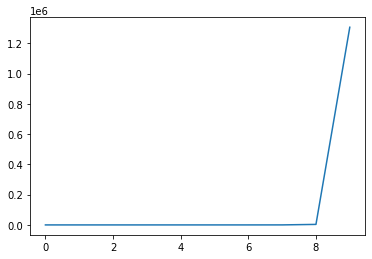

In [201]:
alpha = 0.1 # say we pick alpha = 0.1
cost = [] # stores the cost after each iteration
thetas = [0, 0, 0] # start with 0 value for each parameters
for i in range(10):
    thetas = gradient_descent_iteration(alpha, thetas, xs, ys)
    ith_cost = cost_value(thetas, xs, ys)
    cost.append(ith_cost)
print(cost)
plt.plot(range(10), cost)

# Normal Equation Method
If we have the following linear regression model  
$\hat{y} = \sum_{i = 0}^{n} \theta_i x_i$ being $x_0 = 1$ for all training samples.  
then an optimal value of $\theta = [\theta_0, \theta_1, ..., \theta_n]$ can be computed as follows:  
$\theta = (X^TX)^{-1}X^Ty$

In [207]:
# let's fetch the input and output from the data-set
x = data_set[['dummy', 'size', 'bedrooms']]
y = np.log(data_set['price'])
# append the dummy-input
print(x.head())
print(y.head())

   dummy  size  bedrooms
0      1  2104         3
1      1  1600         3
2      1  2400         3
3      1  1416         2
4      1  3000         4
0    12.898970
1    12.706545
2    12.818552
3    12.354493
4    13.199139
Name: price, dtype: float64


For the normal-equation method we need no feature scaling and we can simply proceed further for evaluating the value of theta.  Let's now split the data-set into training and testing.  

In [208]:
# split the data-set into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)
print(X_train.shape)
print(X_test.shape)

(37, 3)
(10, 3)


In [209]:
# get the x and the y
x = X_train
y = y_train
# get the transpose
xT = x.T
# compute the values of thetas
thetas = np.dot(np.dot(np.linalg.inv(np.dot(xT, x)), xT), y)
print(thetas)

[1.19108520e+01 3.55026346e-04 1.93179922e-02]


In [210]:
# make predictions
predictions = []
length = len(y_test)
for i in range(length):
    x = X_test.iloc[i]
    pred = np.dot(thetas, x.T)
    predictions.append(pred)
predictions

[12.478978825888722,
 12.596137519982511,
 12.899476588792433,
 12.602381424656777,
 12.25197042141263,
 12.536848120244139,
 12.394837581948638,
 12.538268225627094,
 12.418122751218366,
 12.75569091876824]

<AxesSubplot:ylabel='price'>

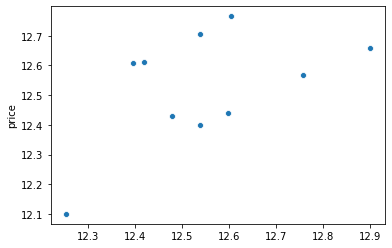

In [218]:
# plot the predicted vs. actual values
sns.scatterplot(predictions, y_test)

In [212]:
# compute the stats of our prediction
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(predictions, y_test)
print("RMSE: {}".format(np.sqrt(mse)))

RMSE: 0.17353087502412656


In [220]:
# sample prediction on last item in our data-set
x = [1, 1203, 3]
test = thetas[0] * x[0] + thetas[1] * x[1] + thetas[2] * x[2]
predicted_cost = np.exp(test)
print(predicted_cost)

241808.81227698294

Actual house price for (1203, 3) is 239500 and predicted price is 241808 which is quite closed to the actual house price!

In [224]:
# let's manually have a look at difference between the predicted and actual value
# here we have small data-set so we can manually observe 
# otherwise visual representation is always there
residual_errors = (predictions - y_test)
print(residual_errors)
print("Residual error mean: {}".format(np.mean(residual_errors)))

35    0.050163
20    0.155388
42    0.242328
30   -0.163021
44    0.151814
1    -0.169697
43   -0.213361
22    0.137863
16   -0.193082
39    0.188453
Name: price, dtype: float64
0.01868487818150406


The mean of the residual errors is quite close to zero!

# Python's built in LinearRegression from sklearn

In [227]:
# let's fetch the input and output from the data-set
x = data_set[['size', 'bedrooms']]
y = np.log(data_set['price'])
# append the dummy-input
print(x.head())
print(y.head())

   size  bedrooms
0  2104         3
1  1600         3
2  2400         3
3  1416         2
4  3000         4
0    12.898970
1    12.706545
2    12.818552
3    12.354493
4    13.199139
Name: price, dtype: float64


In [228]:
# split the data-set into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)
print(X_train.shape)
print(X_test.shape)

(37, 2)
(10, 2)


In [229]:
# create a linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [230]:
# train the model
model.fit(X_train, y_train)

LinearRegression()

In [232]:
# make predictions
predictions = model.predict(X_test)
print(predictions)

[12.47897883 12.59613752 12.89947659 12.60238142 12.25197042 12.53684812
 12.39483758 12.53826823 12.41812275 12.75569092]


<AxesSubplot:ylabel='price'>

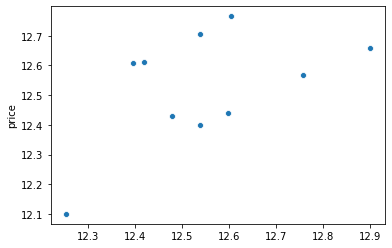

In [233]:
# plot the predicted vs. actual values
sns.scatterplot(predictions, y_test)

In [234]:
# compute the stats of our prediction
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(predictions, y_test)
print("RMSE: {}".format(np.sqrt(mse)))

RMSE: 0.17353087502413403


In [237]:
# sample prediction on last item in our data-set
x = [1, 1203, 3]
test = thetas[0] * x[0] + thetas[1] * x[1] + thetas[2] * x[2]
predicted_cost = np.exp(test)
print(predicted_cost)

241808.81227698294


Actual house price for (1203, 3) is 239500 and predicted price is 241808 which is quite closed to the actual house price!

In [238]:
# let's manually have a look at difference between the predicted and actual value
# here we have small data-set so we can manually observe 
# otherwise visual representation is always there
residual_errors = (predictions - y_test)
print(residual_errors)
print("Residual error mean: {}".format(np.mean(residual_errors)))

35    0.050163
20    0.155388
42    0.242328
30   -0.163021
44    0.151814
1    -0.169697
43   -0.213361
22    0.137863
16   -0.193082
39    0.188453
Name: price, dtype: float64
Residual error mean: 0.01868487818152751


As we can see that sklearn's linear-regression gives us the same results as we have for the normal-equations method.  

# ThankYou!